In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, PredefinedSplit, cross_validate
import utils as utils
from sklearn.linear_model import LogisticRegressionCV
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brendanbrady/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('text_entailment_dataset/train.csv')

# Shuffle the DataFrame
df = df.sample(frac=0.01, random_state=42)  # Shuffle with fixed seed for reproducibility

# Split the data into training and validation sets
train_df, validation_df = train_test_split(df, test_size=0.1, random_state=42)

# Write the training and validation DataFrames to separate CSV files
train_df.to_csv('text_entailment_dataset/train_data.csv', index=False)
validation_df.to_csv('text_entailment_dataset/validation_data.csv', index=False)


train_dataset = df = pd.read_csv('text_entailment_dataset/train_data.csv')
validation_dataset = df = pd.read_csv('text_entailment_dataset/validation_data.csv')
test_dataset = df = pd.read_csv('text_entailment_dataset/test_data.csv')

In [3]:
test_dataset.head()

,premise,hypothesis
0,This church choir sings to the masses as they ...,The church has cracks in the ceiling.
1,This church choir sings to the masses as they ...,The church is filled with song.
2,This church choir sings to the masses as they ...,A choir singing at a baseball game.
3,"A woman with a green headscarf, blue shirt and...",The woman is young.
4,"A woman with a green headscarf, blue shirt and...",The woman is very happy.


In [4]:
test_dataset.shape

(9824, 2)

In [5]:
train_dataset[["premise"]] = train_dataset[["premise"]].astype(str)
train_dataset["premise"] = train_dataset["premise"].apply(utils.change_lower)
train_dataset["premise"] = train_dataset["premise"].apply(utils.clean_data)
train_dataset["premise"] = train_dataset["premise"].apply(utils.remover)

train_dataset[["hypothesis"]] = train_dataset[["hypothesis"]].astype(str)
train_dataset["hypothesis"] = train_dataset["hypothesis"].apply(utils.change_lower)
train_dataset["hypothesis"] = train_dataset["hypothesis"].apply(utils.clean_data)
train_dataset["hypothesis"] = train_dataset["hypothesis"].apply(utils.remover)

validation_dataset[["premise"]] = validation_dataset[["premise"]].astype(str)
validation_dataset["premise"] = validation_dataset["premise"].apply(utils.change_lower)
validation_dataset["premise"] = validation_dataset["premise"].apply(utils.clean_data)
validation_dataset["premise"] = validation_dataset["premise"].apply(utils.remover)

validation_dataset[["hypothesis"]] = validation_dataset[["hypothesis"]].astype(str)
validation_dataset["hypothesis"] = validation_dataset["hypothesis"].apply(utils.change_lower)
validation_dataset["hypothesis"] = validation_dataset["hypothesis"].apply(utils.clean_data)
validation_dataset["hypothesis"] = validation_dataset["hypothesis"].apply(utils.remover)

test_dataset[["premise"]] = test_dataset[["premise"]].astype(str)
test_dataset["premise"] = test_dataset["premise"].apply(utils.change_lower)
test_dataset["premise"] = test_dataset["premise"].apply(utils.clean_data)
test_dataset["premise"] = test_dataset["premise"].apply(utils.remover)

test_dataset[["hypothesis"]] = test_dataset[["hypothesis"]].astype(str)
test_dataset["hypothesis"] = test_dataset["hypothesis"].apply(utils.change_lower)
test_dataset["hypothesis"] = test_dataset["hypothesis"].apply(utils.clean_data)
test_dataset["hypothesis"] = test_dataset["hypothesis"].apply(utils.remover)

In [6]:
train_pairs = [train_dataset["premise"][i] + " " + train_dataset["hypothesis"][i] for i in range(len(train_dataset.index))]
validation_pairs = [validation_dataset["premise"][i] + " " + validation_dataset["hypothesis"][i] for i in range(len(validation_dataset.index))]
test_pairs = [test_dataset["premise"][i] + " " + test_dataset["hypothesis"][i] for i in range(len(test_dataset.index))]

In [7]:
print(train_pairs[0])

young man brown shirt work computer someone homework computer


In [8]:
BINARIZED = False

vectorizer = CountVectorizer(binary=BINARIZED)

train_vectorized = vectorizer.fit_transform(train_pairs).toarray()

validation_vectorized = vectorizer.transform(validation_pairs).toarray()

test_vectorized = vectorizer.transform(test_pairs).toarray()

In [9]:
print("Size of vocabulary:", len(vectorizer.get_feature_names_out()))

Size of vocabulary: 5901


In [10]:
train_validation_vectorized = np.array([row for row in train_vectorized] + [row for row in validation_vectorized])

labels = np.array(train_dataset["label"].to_list() + validation_dataset["label"].to_list())

split_groups = [0 for i in range(train_vectorized.shape[0])] + [1 for i in range(validation_vectorized.shape[0])]

split = PredefinedSplit(split_groups)

In [11]:
print(len(train_validation_vectorized))
print(len(train_validation_vectorized[0]))
print(len(labels))
print(len(split_groups))

5494
5901
5494
5494


In [13]:
MAX_ITER = 5
classifier = LogisticRegressionCV(max_iter=MAX_ITER)

scoring_metrics = ("precision_micro", "recall_micro", "f1_micro", "accuracy", "neg_log_loss")

results = cross_validate(classifier, train_validation_vectorized, labels, scoring=scoring_metrics, cv=split)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

In [16]:
print(results.keys())

dict_keys(['fit_time', 'score_time', 'test_precision_micro', 'test_recall_micro', 'test_f1_micro', 'test_accuracy', 'test_neg_log_loss'])


In [17]:
import matplotlib.pyplot as plt

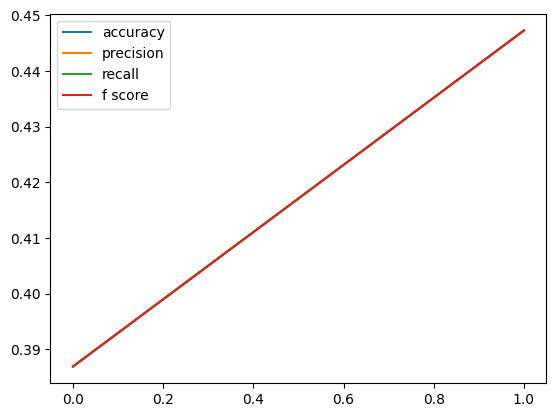

In [22]:
iters = list(range(1, 6))
plt.plot(results['test_accuracy'], label='accuracy')
plt.plot(results['test_precision_micro'], label='precision')
plt.plot(results['test_recall_micro'], label='recall')
plt.plot(results['test_f1_micro'], label='f score')
plt.legend()